In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
white = pd.read_csv('../winequality-white.csv', sep=';')
white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [5]:
new_col = ['fixed acidity', 'volatile acidity','residual sugar','chlorides', 
           'total sulfur dioxide', 'density', 'pH', 'alcohol', 'quality']

# removing less correlated columns form dataset
white = white[[c for c in white.columns if c in new_col]]

white.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol,quality
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,8.8,6
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,9.5,6
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,10.1,6
3,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,9.9,6
4,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,9.9,6


In [6]:
# check for null values
white.isna().any()

fixed acidity           False
volatile acidity        False
residual sugar          False
chlorides               False
total sulfur dioxide    False
density                 False
pH                      False
alcohol                 False
quality                 False
dtype: bool

### A purely random classifier - just as a reference

In [7]:
# just a baseline purely random classifier
# for a balanced binary classification problem the below accuracy would be 50%
# assumption - purely balanced between all classes (not in our case)

import numpy as np
import random

X = white[white.columns[:-1]]
Y = white[white.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

random.seed(5)
test_labels_copy = random.sample(list(y_test), len(y_test), )
hits_array = np.array(y_test) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(y_test)

# our baseline random classifier performs ~31% on the test set

0.3142857142857143

In [8]:
white.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,6.391415,0.045772,138.360657,0.994027,3.188267,10.514267,5.877909
std,0.843868,0.100795,5.072058,0.021848,42.498065,0.002991,0.151001,1.230621,0.885639
min,3.800000,0.080000,0.600000,0.009000,9.000000,0.987110,2.720000,8.000000,3.000000
25%,6.300000,0.210000,1.700000,0.036000,108.000000,0.991723,3.090000,9.500000,5.000000
50%,6.800000,0.260000,5.200000,0.043000,134.000000,0.993740,3.180000,10.400000,6.000000
75%,7.300000,0.320000,9.900000,0.050000,167.000000,0.996100,3.280000,11.400000,6.000000
max,14.200000,1.100000,65.800000,0.346000,440.000000,1.038980,3.820000,14.200000,9.000000


### Neural Network model

In [9]:
# removing outliers - similar method like previous

from sklearn.preprocessing import StandardScaler
white_ssc = white.copy()
scaler = StandardScaler().fit(white_ssc[white_ssc.columns[:-1]])
white_ssc[white_ssc.columns[:-1]] = scaler.transform(white_ssc[white_ssc.columns[:-1]])

# clipping top 5 %ile outliers

# selecting only the columns that have > 50% or more deviation from 95%ile to 99%ile
for col in ['chlorides' ]:    
    print(col)
    print('Pre clipping ',white_ssc[col].quantile(.95) , white_ssc[col].quantile(.99))
    print('% increase btw 95%ile and 99%ile = ', ((white_ssc[col].quantile(.99) -white_ssc[col].quantile(.95) )/white_ssc[col].quantile(.99))*100)
    print('removing points above 95th percentile')
    white_ssc = white_ssc[white_ssc[col]< white_ssc[col].quantile(.95)]
    print('Post clipping ',white_ssc[col].quantile(.95) , white_ssc[col].quantile(.99))
    print('------')

chlorides
Pre clipping  0.9717064373075095 5.228829787443533
% increase btw 95%ile and 99%ile =  81.41636892367472
removing points above 95th percentile
Post clipping  0.5597267582620875 0.7886043577317664
------


In [10]:
white_ssc.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol,quality
count,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000,4643.000000
mean,0.004128,-0.025021,-0.002711,-0.171489,-0.014161,-0.023016,0.023049,0.040460,5.903941
std,1.009493,0.979144,0.983780,0.440406,1.000298,0.981413,0.998298,0.999007,0.886147
min,-3.620351,-1.966985,-1.141944,-1.683274,-3.044230,-2.313038,-3.101408,-2.043297,3.000000
25%,-0.657501,-0.677101,-0.925047,-0.493110,-0.714474,-0.789934,-0.650836,-0.824276,5.000000
50%,-0.064931,-0.180992,-0.234922,-0.172682,-0.126152,-0.126187,-0.054751,-0.092863,6.000000
75%,0.527639,0.414339,0.677030,0.147747,0.673966,0.666295,0.607565,0.719818,6.000000
max,8.705106,8.153643,4.970598,0.925931,7.098444,5.441254,4.184075,2.995326,9.000000


In [44]:
white = white_ssc.copy()

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler, RobustScaler

white = white.sample(frac=1).reset_index(drop=True)

X = white[white.columns[:-1]]
Y = white[white.columns[-1]]

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
one_hot_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X,one_hot_y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
import time
t1 = time.time()

from keras import regularizers
from keras.optimizers import Adam, RMSprop, Adagrad

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

sgd = SGD()
adam = Adam()
rmsprop = RMSprop()
adagrad = Adagrad()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=[X_test,y_test])

print("Time elapsed for training", time.time()-t1)


Train on 3918 samples, validate on 980 samples
Epoch 1/100
3918/3918 [==============================] - 5s 1ms/step - loss: 2.2760 - acc: 0.3093 - val_loss: 1.9268 - val_acc: 0.4663
Epoch 2/100
3918/3918 [==============================] - 0s 89us/step - loss: 1.8489 - acc: 0.4569 - val_loss: 1.6832 - val_acc: 0.4857
Epoch 3/100
3918/3918 [==============================] - 0s 89us/step - loss: 1.6781 - acc: 0.4714 - val_loss: 1.5652 - val_acc: 0.4898
Epoch 4/100
3918/3918 [==============================] - 0s 89us/step - loss: 1.5691 - acc: 0.4824 - val_loss: 1.4877 - val_acc: 0.4878
Epoch 5/100
3918/3918 [==============================] - 0s 94us/step - loss: 1.5017 - acc: 0.4860 - val_loss: 1.4303 - val_acc: 0.4908
Epoch 6/100
3918/3918 [==============================] - 0s 124us/step - loss: 1.4308 - acc: 0.5130 - val_loss: 1.3725 - val_acc: 0.5143
Epoch 7/100
3918/3918 [==============================] - 0s 112us/step - loss: 1.3785 - acc: 0.5048 - val_loss: 1.3299 - val_acc: 0.5204


#### Findings from multiple iterations 

1. Above model was iteratively selected. All these exploration/tuning on 200-300 epochs.                                                       
2. Initially a big model was chosen - got lots of overfitting
3. Used dropouts - significant improvement in reducing overfit
4. Got to above smaller architecture
5. Dropouts reduced overfit but no improvement in accuracy
6. tried multiple optimizers - rmsprop, adagrad - OverFit , sgd - underfit
7. Also kernel regularizers was important to reduce overfitting
8. No significant change when altering batch_size on above conifg.


#### Results

Validation accuracy - 54% 
Processor Time - 44 sec



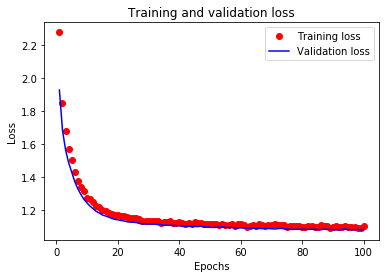

In [66]:
# 32,32, model
import matplotlib.pyplot as plt
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

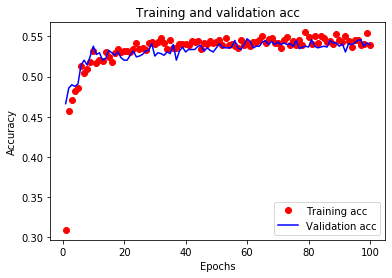

In [67]:
# 32,32 model
import matplotlib.pyplot as plt
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()